In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [6]:
housing =fetch_california_housing()
x_train_full,x_test,y_train_full, t_test = train_test_split(housing.data,housing.target,random_state=42)
x_train,x_valid,y_train, y_valid= train_test_split(x_train_full,y_train_full,random_state=42)

In [7]:
len(x_train_full)

15480

In [8]:
len(x_train)

11610

In [9]:
len(x_valid)

3870

In [10]:
len(x_test)

5160

Convert the X_TRAIN to datafram 

In [11]:
df_train = pd.DataFrame(x_train,columns=housing.feature_names)
print(df_train.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.5214      15.0  3.049945   1.106548      1447.0  1.605993     37.63   
1  5.3275       5.0  6.490060   0.991054      3464.0  3.443340     33.69   
2  3.1000      29.0  7.542373   1.591525      1328.0  2.250847     38.44   
3  7.1736      12.0  6.289003   0.997442      1054.0  2.695652     33.55   
4  2.0549      13.0  5.312457   1.085092      3297.0  2.244384     33.93   

   Longitude  
0    -122.43  
1    -117.39  
2    -122.98  
3    -117.70  
4    -116.93  


Lets Standardise the data to normal distribution in range of [-1,1]

In [12]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.fit_transform(x_valid)
x_test=scaler.fit_transform(x_test)

In [13]:
print(pd.DataFrame(x_train,columns=housing.feature_names))

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0     -0.193979 -1.077813 -0.943385   0.014853    0.020733 -0.572916   
1      0.751983 -1.868895  0.405478  -0.233277    1.861465  0.205165   
2     -0.414691  0.029701  0.818088   1.056784   -0.087867 -0.299833   
3      1.718896 -1.315138  0.326644  -0.219551   -0.337922 -0.111466   
4     -0.962072 -1.236030 -0.056258  -0.031244    1.709059 -0.302570   
...         ...       ...       ...        ...         ...       ...   
11605 -0.814058  0.108810 -0.817233  -0.195044   -0.533220  0.320976   
11606  0.107864  1.690973 -0.261893  -0.135849   -0.231147 -0.191147   
11607 -1.223323  0.504350 -0.516003   0.258887    0.452397  0.134491   
11608 -0.935570  1.849189 -0.108785  -0.061589   -0.057751 -0.013545   
11609  0.895860  0.187918  0.299475  -0.156707   -0.171827 -0.178234   

       Latitude  Longitude  
0      0.929260  -1.422155  
1     -0.916547   1.096670  
2      1.308729  -1.697027  
3     -0.982134   0

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

Model Architecture

PLOT THE LOSS FOR BETTER UNDERSTANDING

In [15]:

#removed one layer to check the overfittiing

model = keras.models.Sequential([
    keras.layers.Input(shape=x_train.shape[1:]),   
    keras.layers.Dense(30, activation="relu"),
    
    keras.layers.Dense(1)
])


I0000 00:00:1771069325.512817      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13757 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771069325.518850      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [16]:


model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(learning_rate=0.005)
)

history = model.fit(
    x_train,
    y_train,
    epochs=60,
    validation_data=(x_valid, y_valid)
)


Epoch 1/60


I0000 00:00:1771069327.138075     127 service.cc:152] XLA service 0x7905a80045d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771069327.138118     127 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1771069327.138122     127 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1771069327.278168     127 cuda_dnn.cc:529] Loaded cuDNN version 91002


 88/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2166  

I0000 00:00:1771069327.836494     127 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7425 - val_loss: 0.6616
Epoch 2/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6956 - val_loss: 1.1814
Epoch 3/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7710 - val_loss: 0.5841
Epoch 4/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5292 - val_loss: 0.4852
Epoch 5/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4692 - val_loss: 0.4673
Epoch 6/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4503 - val_loss: 0.4585
Epoch 7/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4389 - val_loss: 0.4528
Epoch 8/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4306 - val_loss: 0.4488
Epoch 9/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4240 - val_loss: 0.4456
Epoch 10/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4185 - val_loss: 0.4428
Epoch 11/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4138 - val_loss: 0.4403
Epoch 12/60
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

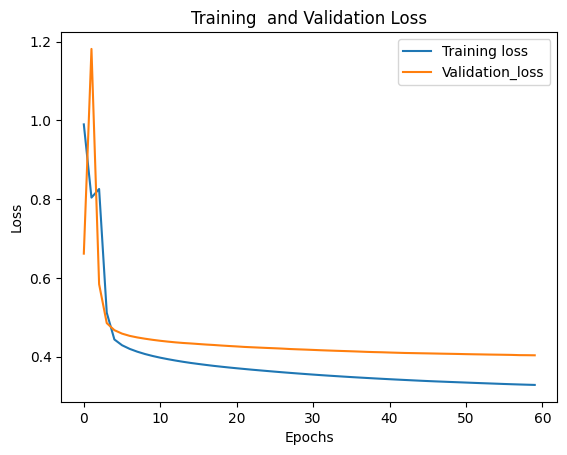

In [17]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training  and Validation Loss")
plt.show()


Model evaluation

In [18]:
mse_test = model.evaluate(x_test,t_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3599


Making a prediction

In [19]:
x_new =x_test[:3]
y_pred = model.predict(x_new)


for i in range(len(x_new)):
    print(f"Sample{i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {t_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Sample1:
Predicted: 0.668628990650177
Actual: 0.477
Sample2:
Predicted: 1.5628647804260254
Actual: 0.458
Sample3:
Predicted: 4.893692970275879
Actual: 5.00001


In [ ]:
just change some hyperparameters to get very accurate resultsss